# Unidad 4 - Actividad 1
# Materia: **Análisis de Algoritmos y Estructuras para Datos Masivos**
# Alumno: **Luis Fernando Izquierdo Berdugo**
# Fecha: **11 de Septiembre de 2024**

### Objetivo 
Esta actividad se enfoca en la implementación y explicación de cuatro algoritmos de ordenamiento fundamentales: bubble-sort, insertion-sort, merge-sort y quick-sort. Se requiere que cada algoritmo sea programado y detalladamente explicado en términos de su funcionamiento y lógica.

### Implemente y explique los siguientes algoritmos:
- Bubble-Sort
- Insertion-Sort
- Merge-Sort
- Quick-Sort

Cada explicación debe abordar cómo funciona el algoritmo y cuáles son sus características principales.

### Experimentación con Datos Perturbados
Utilice los archivos `unsorted-list-p=*.json`, basados en el archivo `listas-posteo-100.json` alterado en proporciones de $p=0.01,0.03,0.1,0.3$. Siga el procedimiento en el notebook `perturbar-listas.ipynb` para la perturbación. Puede usar sus propias listas de posteo perturbadas, siempre que sean comparables en tamaño.

### Análisis de Resultados:

- Realice experimentos ordenando las listas con cada algoritmo y para cada valor de p.
- **Grafique el número de comparaciones necesarias por algoritmo**: Elabore un solo gráfico que compare el número de comparaciones realizadas por cada algoritmo. Analice los resultados en relación a la teoría, explicando si los resultados coinciden o discrepan de lo esperado y por qué.
- **Grafique el tiempo en segundos requerido por algoritmo**: Prepare un solo gráfico que muestre el tiempo necesario para ordenar las listas por cada algoritmo. Realice un análisis detallado de estos tiempos, discutiendo si concuerdan o difieren de las expectativas teóricas y las posibles razones de estas diferencias.
- **Presentación de Resultados**: Los resultados deben ser presentados en una tabla agregada para facilitar la comparación y el análisis.

**Nota 1**: Recuerde copiar o cargar cada lista para evitar ordenar conjuntos completamente ordenados.

**Nota 2**: Repita varias veces las operaciones de ordenamiento, esto es muy importante sobre para la estabilidad de los tiempos en segundos (vea Nota 1).

**Nota 3**: En las implementaciones podrá usar cualquier comparación que le convenga, i.e., $<$, $\le$, $cmp$ -> {-1, 0, 1}, etc.

**Nota 4**: Tome en cuenta que varios lenguajes de programación (Python y Julia) hacen copias de los arreglos cuando se usa slicing, i.e., `arr[i:j]` creará un nuevo arreglo y eso implica costos adicionales innecesarios:

- Para Python: use índices o arreglos de numpy. Adicionalmente, asegurese que los arreglos contienen datos nativos y no sean objetos.

## Introducción

Los algoritmos de ordenamiento son un conjunto de instrucciones que permiten organizar una lista de elementos en un orden específico (el cual puede ser ascendente o descendiente). Estos son importantes en numerosas aplicaciones como lo pueden ser las bases de datos de alguna aplicación, las diversas funciones que se pueden utilizar para ordenar los datos en Excel, etc.

A pesar de que existe una gran variedad de algoritmos de ordenamiento, en este caso se centrará en cuatro específicos, los cuales son:
- Bubble Sort
- Insertion Sort
- Merge Sort
- Quick Sort

## Inciso 1 - Implementación de los algoritmos de ordenamiento

## Bubble Sort

El algoritmo de ordenamiento conocido como "Bubble Sort" se basa en el ordenamiento de pares de  elementos adyacentes en una lista. Revisa los pares y, si están en el orden incorrecto, les intercambia de lugar, lo cual se repite hasta que la lista está correctamente ordenada.

A pesar de que este algoritmo es el más sencillo de implementar, es ineficiente para listas de un tamaño mayor, teniendo una complejidad temporal de **$O(n^2)$**.

En la función para el bubble sort, se tomará de entrada la lista que se desea ordenar y se guardará en una variable la longitud de la misma.

Se hará un recorrido por todos los elementos de un arreglo y se declarará falso una variable que indica si se cambió de lugar el elemento a analizar.

Dentro de este recorrido, por el arreglo de nuevo, esta vez siendo de 0 a la longitud de la lista, menos el valor i, menos 1. Esto debido a que el último elemento del valor i ya está en su lugar.
Si el valor encontrado es mayor que el siguiente elemento, se cambia de lugar. En caso de que no se cambien de lugar, se rompe el loop más interno y se pasa al siguiente elemento de la lista, ya que el valor actual ya está en su lugar.

In [108]:
import copy
def bubbleSort(lista):
  ordenamiento = copy.deepcopy(lista)
  n = len(ordenamiento)
  comparaciones = 0

  # Se recorren todos los elementos de la lista
  for i in range(n):
    swapped = False

    # El último elemento de i ya están en su lugar
    for j in range(0, n-i-1):

      # Se cambia si el elemento j es más grande que el siguiente elemento
      comparaciones += 1
      if ordenamiento[j] > ordenamiento[j+1] :
        ordenamiento[j], ordenamiento[j+1] = ordenamiento[j+1], ordenamiento[j]
        swapped = True

    # Si no hubo cambio, se rompe el loop interno
    if swapped == False:
      break
    
  return ordenamiento, comparaciones

In [109]:
lista = [1,2,15,6,9,4,7,5,8,12,63,87,56,73]
bs, bsc = bubbleSort(lista)
print("Lista desordenada:", lista)
print("Lista ordenada:", bs)
print("Comparaciones:", bsc)

Lista desordenada: [1, 2, 15, 6, 9, 4, 7, 5, 8, 12, 63, 87, 56, 73]
Lista ordenada: [1, 2, 4, 5, 6, 7, 8, 9, 12, 15, 56, 63, 73, 87]
Comparaciones: 55


## Insertion Sort

El algoritmo de inserción compara los elementos con el inmediato anterior e intercambia sus lugares si el anterior es mayor (o se repite hasta que alcance el principio de la lista o encuentre uno mayor).

Este algoritmo es simple de implementar y es eficiente para listas pequeñas o aquellas que estén casi ordenadas. Su complejidad temporal es cuadrática **$O(n^2$)**

La función toma como parámetro la lista a ordenar. Lo primero que esta función hará será recorrer la lista desde el segundo elemento hasta el final (longitud de la lista), ya que se considera que el primer elemento ya está ubicado correctamente.

Guarda en la variable `key`el valor actual que se insertará y compara el valor de `key` con los elementos a su izquierda, hasta que está en su posición correcta y lo inserta en la tabla.

In [110]:
def insertionSort(lista):
  ordenamiento = copy.deepcopy(lista)
  comparaciones = 0
  #Se recorre del segundo elemento de la lista hasta el final.
  for i in range(1, len(ordenamiento)):
    #Se guarda el valor actual a insertar
    key = ordenamiento[i]
    j = i-1
    #Se compara el valor de key con los elementos a su izquierda 
    # hasta que encuentre su posición correcta y lo inserta.
    while j >= 0 and key < ordenamiento[j]:
      ordenamiento[j+1] = ordenamiento[j]
      j -= 1
      comparaciones += 1
    ordenamiento[j+1] = key
  return ordenamiento, comparaciones

In [111]:
lista = [73,99,6,9,4,7,5,8,12,63,87,56]
isort, isc = insertionSort(lista.copy())
print("Lista desordenada:", lista)
print("Lista ordenada:", isort )
print("Comparaciones:", isc)

Lista desordenada: [73, 99, 6, 9, 4, 7, 5, 8, 12, 63, 87, 56]
Lista ordenada: [4, 5, 6, 7, 8, 9, 12, 56, 63, 73, 87, 99]
Comparaciones: 28


## Merge-sort

Como destacan varias bibliografías, el algoritmo merge-sort utiiza el método de "divide y conquista". En cada iteración ordena un arreglo `A[p:r]`, iniciando por el arreglo entero `A[1:n]` y volviéndolos arreglos cada vez más pequeños.

Se divide el arreglo `A[p:r]` para que se ordene en dos arreglos adyacentes, cada uno con la mitad del tamaño, quedando los arreglos `A[p:q]` y `A[q+1:r]`. De ahí, ambos lados se ordenarán haciendo dividiendose de manera recursiva como se vio anteriormente. Finalmente se combinaran los dos arreglos `A[p:q]` y `A[q+1:r]` en `A[p:r]`, lo cual será nuestra respuesta final.

Este algoritmo, a pesar de ser muy eficiente con complejidad temporal **$O(nlogn)$**, puede no ser muy eficiente por el espacio adicional que requiere al generar las nuevas listas cada que parte la lista principal a la mitad.

En el caso de este algoritmo de ordenamiento, se crearon dos funciones. La primera es como tal el algoritmo merge-sort, que toma de entrada una lista.

Lo primero que se evalúa es si la lista tiene un elemento o menos, en ese caso ya está ordenada y se devuelve la lista. Posteriormente se encuentra la mitad de la lista y se ivide en izquierda o derecha usando la misma función recursivamente. Finalmente se regresa la combinación de ambos lados por medio de la función `merge`.

La función `merge` compara los elementos de las dos listas y los agrega a una lista de resultado

In [112]:
def mergeSort(lista):
    ordenamiento = lista
    if len(ordenamiento) <= 1:
        return ordenamiento, 0

    medio = len(ordenamiento) // 2
    izquierda, compIzq = mergeSort(ordenamiento[:medio])
    derecha, compDer = mergeSort(ordenamiento[medio:])
    resultado, compRes = merge(izquierda, derecha)
    return resultado, compIzq + compDer + compRes

def merge(izquierda, derecha):
    resultado = []
    i = j = 0
    comparaciones = 0

    while i < len(izquierda) and j < len(derecha):
        comparaciones += 1
        if izquierda[i] <= derecha[j]:
            resultado.append(izquierda[i])
            i += 1
        else:
            resultado.append(derecha[j])
            j += 1

    # Agregar los elementos restantes (si los hay)
    resultado.extend(izquierda[i:])
    resultado.extend(derecha[j:])
    return resultado, comparaciones

In [113]:
lista = [73,99,6,9,4,7,5,8,12,63,87,56]
ms, msc = mergeSort(lista)
print("Lista desordenada:", lista.copy())
print("Lista ordenada:", ms)
print("Comparaciones:", msc)

Lista desordenada: [73, 99, 6, 9, 4, 7, 5, 8, 12, 63, 87, 56]
Lista ordenada: [4, 5, 6, 7, 8, 9, 12, 56, 63, 73, 87, 99]
Comparaciones: 29


## Quick Sort

Este algoritmo toma un elemento "pivote" y crea dos arreglos, aquellos menores al elemento pivote y los mayores a este elemento, también ordena recursivamente estos arreglos.

Este algoritmo es muy eficiente para listas grandes, teniendo una cumplejidad temporal de **$O(n log n)$**.

In [114]:
import random
def quickSort(arr):
    def partition(arr, low, high):
        # Elige un pivote aleatorio para mejorar el balance
        pivot = random.randint(low, high)
        arr[pivot], arr[high] = arr[high], arr[pivot]
        i = low - 1
        comparaciones = 0
        for j in range(low, high):
            comparaciones += 1
            if arr[j] <= arr[high]:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1, comparaciones

    def quick_sort_helper(arr, low, high):
        if low < high:
            pi, comparaciones = partition(arr, low, high)
            izqComp = quick_sort_helper(arr, low, pi - 1)
            derComp = quick_sort_helper(arr, pi + 1, high)
            return comparaciones + izqComp + derComp    
        return 0

    comparaciones = quick_sort_helper(arr, 0, len(arr) - 1)
    return arr, comparaciones

In [115]:
lista = [73,99,6,9,4,7,5,8,12,63,87,56]
qs, qsc = quickSort(lista.copy())
print("Lista desordenada:", lista)
print("Lista ordenada:", qs)
print("Comparaciones:", qsc)

Lista desordenada: [73, 99, 6, 9, 4, 7, 5, 8, 12, 63, 87, 56]
Lista ordenada: [4, 5, 6, 7, 8, 9, 12, 56, 63, 73, 87, 99]
Comparaciones: 30


## Inciso 2 - Experimentación con Datos Perturbados

Se crea una función que abre los archivos `.json`y los guarda en distintas variables nombradas según su proporción:
- `p01`
- `p03`
- `p10`
- `p30`

In [116]:
import json
import numpy as np


def openLists(route):
    val = {}
    with open(f'{route}') as file:
        for line in file:
            data = json.loads(line)
            key, values = data
            val[key] = np.array(values)
        return val
    
p01 = openLists('unidad04/unsorted-list-p=0.01.json')
p03 = openLists('unidad04/unsorted-list-p=0.03.json')
p10 = openLists('unidad04/unsorted-list-p=0.10.json')
p30 = openLists('unidad04/unsorted-list-p=0.30.json')


La función `getTime` toma el tiempo que tarda la función de ordenamiento a evaluar y le saca un promedio, de igual manera, recupera las comparaciones que hizo cada función y les saca un promedio

In [117]:
import time
def getTime(funcion_ordenamiento, lista):
  itTimes = []
  comparaciones = []
  for arreglo in lista.values():
    inicio = time.process_time()
    ordenada, comp = funcion_ordenamiento(arreglo)
    fin = time.process_time()
    comparaciones.append(comp)
    total = fin - inicio
    itTimes.append(total)
  promedio = sum(itTimes)/len(itTimes)
  promCom = sum(comparaciones)/len(comparaciones)
  return promedio, ordenada, promCom

Se obtienen los promedios de tiempo y comparaciones para cada función de ordenamiento.

In [118]:
print("Proporción p = 0.01")
tiempoB1, ordenada, cB1 = getTime(bubbleSort, p01)
print(f"Tiempo de ejecución promedio de Bubble Sort: {tiempoB1:.5f} segundos")
tiempoI1, ordenada2, cI1 = getTime(insertionSort, p01)
print(f"Tiempo de ejecución promedio de Insertion Sort: {tiempoI1:.5f} segundos")
tiempoM1, ordenada1, cM1 = getTime(mergeSort, copy.deepcopy(p01))
print(f"Tiempo de ejecución promedio de Merge Sort: {tiempoM1:.5f} segundos")
tiempoQ1, ordenada, cQ1 = getTime(quickSort, copy.deepcopy(p01))
print(f"Tiempo de ejecución promedio de Quick Sort: {tiempoQ1:.5f} segundos")

print(f"Promedio de Comparaciones:\nBubble Sort: {cB1}\nInsertion Sort: {cI1}\nMerge Sort: {cM1}\nQuick Sort: {cQ1}")

Proporción p = 0.01
Tiempo de ejecución promedio de Bubble Sort: 0.00198 segundos
Tiempo de ejecución promedio de Insertion Sort: 0.00123 segundos
Tiempo de ejecución promedio de Merge Sort: 0.00982 segundos
Tiempo de ejecución promedio de Quick Sort: 0.02265 segundos
Promedio de Comparaciones:
Bubble Sort: 4460.5
Insertion Sort: 18.62
Merge Sort: 11492.67
Quick Sort: 27618.29


In [119]:
print("Proporción p = 0.03")
tiempoB2, ordenada, cB2 = getTime(bubbleSort, p03)
print(f"Tiempo de ejecución promedio de Bubble Sort: {tiempoB2:.5f} segundos")
tiempoI2, ordenada, cI2 = getTime(insertionSort, p03)
print(f"Tiempo de ejecución promedio de Insertion Sort: {tiempoI2:.5f} segundos")
tiempoM2, ordenada, cM2 = getTime(mergeSort, copy.deepcopy(p03))
print(f"Tiempo de ejecución promedio de Merge Sort: {tiempoM2:.5f} segundos")
tiempoQ2, ordenada, cQ2 = getTime(quickSort, copy.deepcopy(p03))
print(f"Tiempo de ejecución promedio de Quick Sort: {tiempoQ2:.5f} segundos")

print(f"Comparaciones:\nBubble Sort: {cB2}\nInsertion Sort: {cI2}\nMerge Sort: {cM2}\nQuick Sort: {cQ2}")

Proporción p = 0.03
Tiempo de ejecución promedio de Bubble Sort: 0.00245 segundos
Tiempo de ejecución promedio de Insertion Sort: 0.00142 segundos
Tiempo de ejecución promedio de Merge Sort: 0.01095 segundos
Tiempo de ejecución promedio de Quick Sort: 0.02114 segundos
Comparaciones:
Bubble Sort: 5245.52
Insertion Sort: 55.18
Merge Sort: 11514.46
Quick Sort: 27170.25


In [120]:
print("Proporción p = 0.10")
tiempoB3, ordenada, cB3 = getTime(bubbleSort, p10)
print(f"Tiempo de ejecución promedio de Bubble Sort: {tiempoB3:.5f} segundos")
tiempoI3, ordenada, cI3 = getTime(insertionSort, p10)
print(f"Tiempo de ejecución promedio de Insertion Sort: {tiempoI3:.5f} segundos")
tiempoM3, ordenada, cM3 = getTime(mergeSort, copy.deepcopy(p10))
print(f"Tiempo de ejecución promedio de Merge Sort: {tiempoM3:.5f} segundos")
tiempoQ3, ordenada, cQ3 = getTime(quickSort, copy.deepcopy(p10))
print(f"Tiempo de ejecución promedio de Quick Sort: {tiempoQ3:.5f} segundos")

print(f"Comparaciones:\nBubble Sort: {cB3}\nInsertion Sort: {cI3}\nMerge Sort: {cM2}\nQuick Sort: {cQ3}")

Proporción p = 0.10
Tiempo de ejecución promedio de Bubble Sort: 0.00302 segundos
Tiempo de ejecución promedio de Insertion Sort: 0.00132 segundos
Tiempo de ejecución promedio de Merge Sort: 0.00988 segundos
Tiempo de ejecución promedio de Quick Sort: 0.02144 segundos
Comparaciones:
Bubble Sort: 6770.66
Insertion Sort: 174.63
Merge Sort: 11514.46
Quick Sort: 27190.5


In [121]:
print("Proporción p = 0.30")
tiempoB4, ordenada,cB4 = getTime(bubbleSort, p30)
print(f"Tiempo de ejecución promedio de Bubble Sort: {tiempoB4:.5f} segundos")
tiempoI4, ordenada, cI4 = getTime(insertionSort, p30)
print(f"Tiempo de ejecución promedio de Insertion Sort: {tiempoI4:.5f} segundos")
tiempoM4, ordenada, cM4 = getTime(mergeSort, copy.deepcopy(p30))
print(f"Tiempo de ejecución promedio de Merge Sort: {tiempoM4:.5f} segundos")
tiempoQ4, ordenada, cQ4 = getTime(quickSort, copy.deepcopy(p30))
print(f"Tiempo de ejecución promedio de Quick Sort: {tiempoQ4:.5f} segundos")

print(f"Comparaciones:\nBubble Sort: {cB4}\nInsertion Sort: {cI4}\nMerge Sort: {cM4}\nQuick Sort: {cQ4}")

Proporción p = 0.30
Tiempo de ejecución promedio de Bubble Sort: 0.00401 segundos
Tiempo de ejecución promedio de Insertion Sort: 0.00139 segundos
Tiempo de ejecución promedio de Merge Sort: 0.01020 segundos
Tiempo de ejecución promedio de Quick Sort: 0.02227 segundos
Comparaciones:
Bubble Sort: 8740.14
Insertion Sort: 452.71
Merge Sort: 11753.22
Quick Sort: 27079.05


## Gráficos $p=0.01$

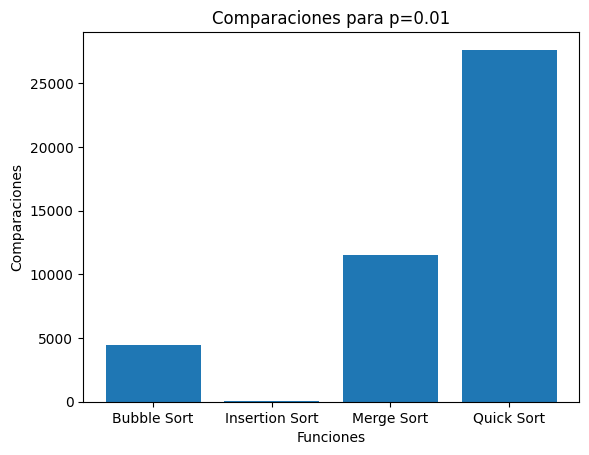

In [122]:
import matplotlib.pyplot as plt
funciones = ["Bubble Sort", "Insertion Sort", "Merge Sort", "Quick Sort"]
promedios = [cB1, cI1, cM1, cQ1]
plt.bar(funciones, promedios)
plt.title("Comparaciones para p=0.01")
plt.xlabel("Funciones")
plt.ylabel("Comparaciones")
plt.show()


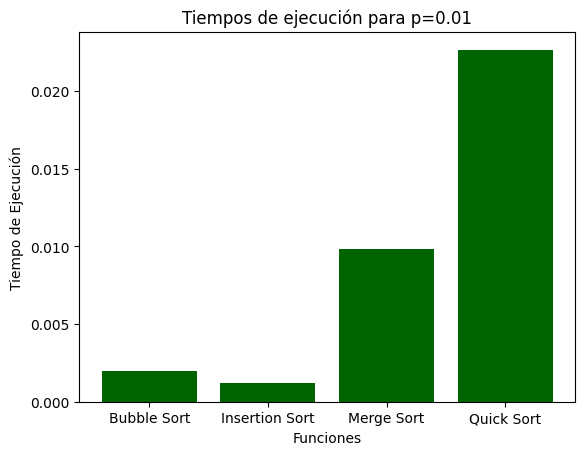

In [123]:
promedios = [tiempoB1, tiempoI1, tiempoM1, tiempoQ1]
plt.bar(funciones, promedios, color="darkGreen")
plt.title("Tiempos de ejecución para p=0.01")
plt.xlabel("Funciones")
plt.ylabel("Tiempo de Ejecución")
plt.show()

## Gráficos $p = 0.03$

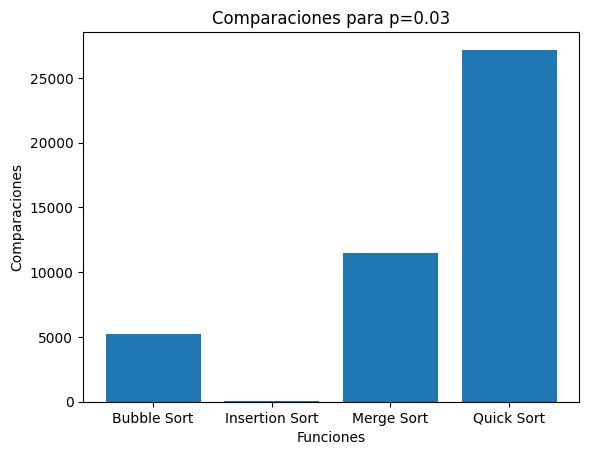

In [124]:
promedios = [cB2, cI2, cM2, cQ2]
plt.bar(funciones, promedios)
plt.title("Comparaciones para p=0.03")
plt.xlabel("Funciones")
plt.ylabel("Comparaciones")
plt.show()

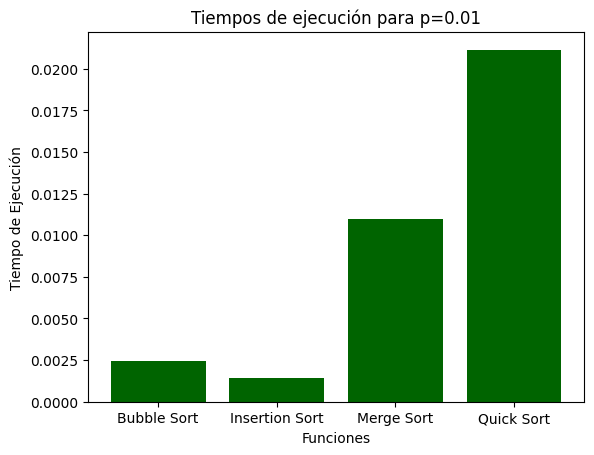

In [125]:
promedios = [tiempoB2, tiempoI2, tiempoM2, tiempoQ2]
plt.bar(funciones, promedios, color="darkGreen")
plt.title("Tiempos de ejecución para p=0.01")
plt.xlabel("Funciones")
plt.ylabel("Tiempo de Ejecución")
plt.show()

## Gráficos $p = 0.10$

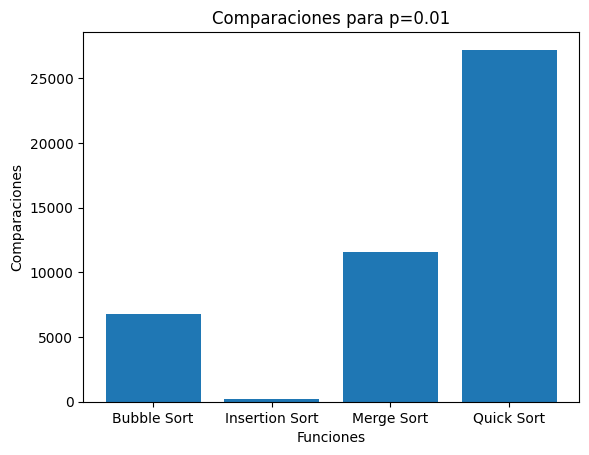

In [126]:
promedios = [cB3, cI3, cM3, cQ3]
plt.bar(funciones, promedios)
plt.title("Comparaciones para p=0.01")
plt.xlabel("Funciones")
plt.ylabel("Comparaciones")
plt.show()

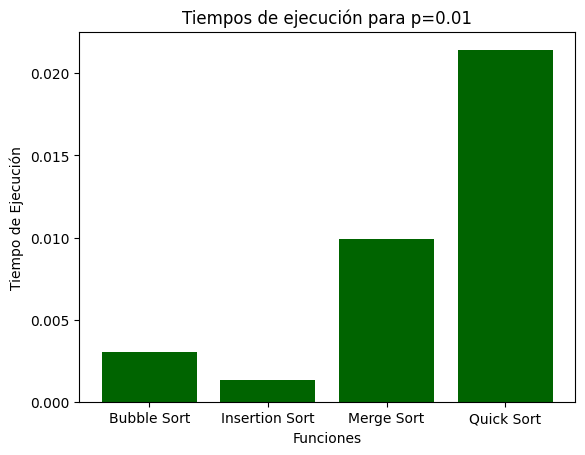

In [127]:
promedios = [tiempoB3, tiempoI3, tiempoM3, tiempoQ3]
plt.bar(funciones, promedios, color="darkGreen")
plt.title("Tiempos de ejecución para p=0.01")
plt.xlabel("Funciones")
plt.ylabel("Tiempo de Ejecución")
plt.show()

## Gráficos $p = 0.30$

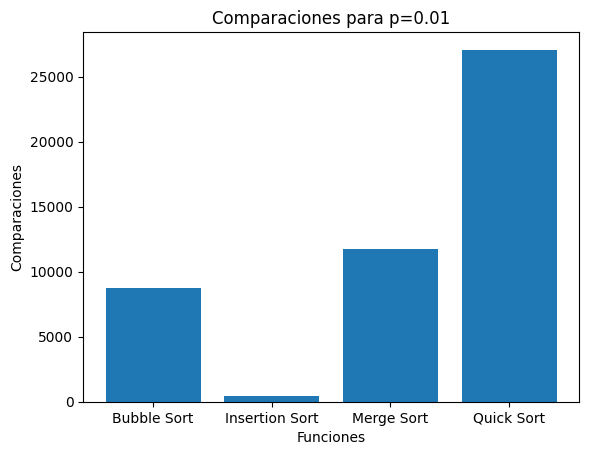

In [128]:
promedios = [cB4, cI4, cM4, cQ4]
plt.bar(funciones, promedios)
plt.title("Comparaciones para p=0.01")
plt.xlabel("Funciones")
plt.ylabel("Comparaciones")
plt.show()

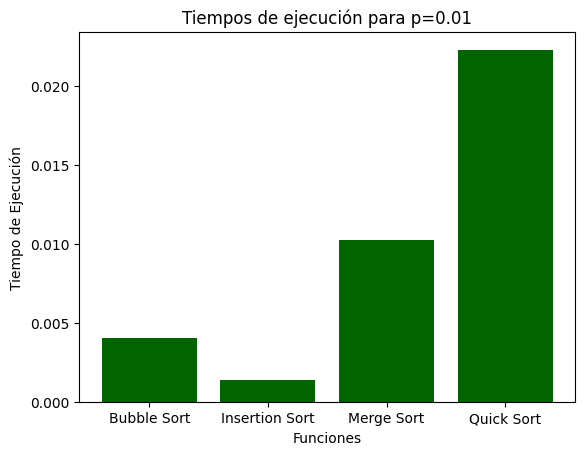

In [129]:
promedios = [tiempoB4, tiempoI4, tiempoM4, tiempoQ4]
plt.bar(funciones, promedios, color="darkGreen")
plt.title("Tiempos de ejecución para p=0.01")
plt.xlabel("Funciones")
plt.ylabel("Tiempo de Ejecución")
plt.show()

## Conclusiones

En términos generales, se puede observar que en los casos de los 4 proporciones para las listas perturbadas se observó el siguiente comportamiento:
- `Insertion Sort` fue el algoritmo que tomo menos tiempo y comparaciones en todos los casos
- `Quick Sort` fue el algoritmo más lento y que tomó más comparaciones.
- En todos los casos el orden del más rápido al más lento fue:
    1. Insertion Sort
    2. Bubble Sort
    3. Merge Sort
    4. Quick Sort

Es interesante analizar los resultados ya que, en teoría, `Quick Sort` debería ser la función de Ordenamiento más rápida de todas, lo mismo con `Merge Sort`; el retraso que se encontró en estos dos se puede deber a varias razones como el tamaño de los datos y la distribución de los elementos, sin embargo, se considera que el error fue de implementación, ya que al ser la primera vez que se implementan estos algoritmos, la implementación no fue tan limpia como podría hacerse al conocer de mejor manera los algoritmos.

Las dificultades encontradas en estos experimentos tuvieron que ver principalmente con el ámbito de programación, ya que, al desconocer como Python utiliza las listas que se le pasan a cada función, constantemente se encontraban errores distintos al procesar los diferentes algoritmos. Uno de estos errores fue que en el Insertion Sort el número de comparaciones siempre devolvía cero; otro fue que al ejecutar más de una vez el mismo algoritmo, cambiaban sus resultados y al ejecutarlo de nuevo, siempre se quedaban con aquellos de la segunda ejecución. La mayor parte de estos errores se solucionó haciendo "deep copies" de las listas al pasárselas a la función de ordenamiento.